# NetworkX
https://networkx.org/documentation/stable/tutorial.html


In [105]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as aprx
import random as r

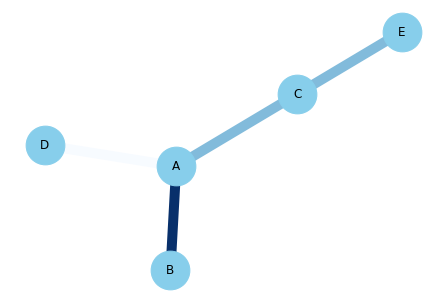

In [2]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'value':[1, 10, 5, 5]})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'], width=10.0, edge_cmap=plt.cm.Blues)

In [214]:
G = nx.Graph()

In [215]:
H = nx.path_graph(8)


In [216]:
G.add_nodes_from(H)

In [217]:
G.add_edges_from([(1,3),(2,4),(3,4),(3,6),(4,0),(3,5),(2,7)])

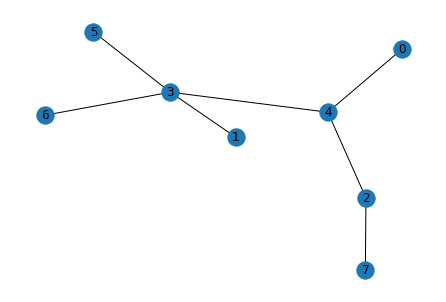

In [218]:
nx.draw(G, with_labels=True)

In [42]:
G.clear()

In [43]:
DG = nx.DiGraph()

In [101]:
DG.add_edges_from([(1,3,{'walks':0}),(2,4,{'walks':0}),(2,5,{'walks':0}),(4,3,{'walks':0}),(5,4,{'walks':0}),(5,6,{'walks':0}),(5,7,{'walks':0}),(3,8,{'walks':0}),(8,7,{'walks':0})])

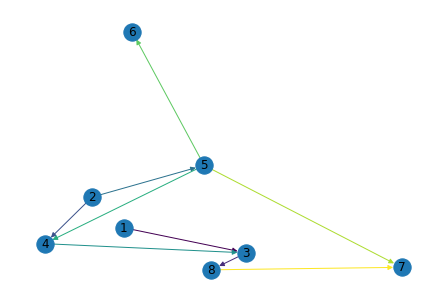

In [102]:
nx.draw(DG, with_labels=True, edge_color=[1,2,3,4,5,6,7,8,9])

In [80]:
list(DG.successors(5))


[4, 6, 7]

In [81]:
DG.degree(5), DG.in_degree(5), DG.out_degree(5)

(4, 1, 3)

In [87]:
list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7}]

In [89]:
nx.clustering(DG)

{1: 0,
 3: 0,
 2: 0.5,
 4: 0.16666666666666666,
 5: 0.08333333333333333,
 6: 0,
 7: 0,
 8: 0}

In [91]:
list(nx.all_pairs_bellman_ford_path(DG))

[(1, {1: [1], 3: [1, 3], 8: [1, 3, 8], 7: [1, 3, 8, 7]}),
 (3, {3: [3], 8: [3, 8], 7: [3, 8, 7]}),
 (2,
  {2: [2],
   4: [2, 4],
   5: [2, 5],
   3: [2, 4, 3],
   6: [2, 5, 6],
   7: [2, 5, 7],
   8: [2, 4, 3, 8]}),
 (4, {4: [4], 3: [4, 3], 8: [4, 3, 8], 7: [4, 3, 8, 7]}),
 (5, {5: [5], 4: [5, 4], 6: [5, 6], 7: [5, 7], 3: [5, 4, 3], 8: [5, 4, 3, 8]}),
 (6, {6: [6]}),
 (7, {7: [7]}),
 (8, {8: [8], 7: [8, 7]})]

In [94]:
aprx.one_exchange(G)

(7, ({0, 2, 3}, {1, 4, 5, 6, 7}))

In [103]:
DG.edges[1,3]['walks']

0

# Random Walk

In [229]:
def add_walks_property(G):
    for e in list(G.edges): G.edges[e]['walks'] = 0


In [162]:
def init_graph():
    DG = nx.DiGraph()
    DG.add_edges_from([(1,3,{'walks':0}),(2,4,{'walks':0}),(2,5,{'walks':0}),(4,3,{'walks':0}),(5,4,{'walks':0}),(5,6,{'walks':0}),(5,7,{'walks':0}),(3,8,{'walks':0}),(8,7,{'walks':0})])
    return DG

In [230]:
def init_tree():
    DG = nx.DiGraph()
    DG.add_edges_from([(1,2),(1,3),(2,4),(2,5),(3,6),(3,7)])
    add_walks_property(DG)
    return DG

In [146]:
def get_random_next(x):
    d = DG.out_degree(x)
    if d == 0:
        return None
    i = r.randint(0,d-1)
    return list(DG.successors(x))[i]

In [155]:
def get_starting_node():
    nodes = list(DG.nodes)
    i = r.randint(0, len(nodes) - 1)
    return nodes[i]

In [260]:
def get_limited_starting_node():
    nodes = []
    for n in DG.nodes:
        if DG.in_degree(n) == 0:
            nodes.append(n)
    i = r.randint(0, len(nodes) - 1)
    return nodes[i]    

In [317]:
def do_random_walk(k, limited = False, endless = False):
    for j in range(k):
        i = 0
        if limited:
            a = get_limited_starting_node()
        else:
            a = get_starting_node()
        while True:
            i+=1
            if endless:
                if i >= 10:
                    break
            b = get_random_next(a)
            if b is None:
                break
            DG.edges[a,b]['walks']+=1
            a = b

In [264]:
def print_walks():
    for i, e in enumerate(DG.edges):
        dgl = list(DG.edges)
        print(dgl[i], DG.edges[dgl[i]]['walks'])

In [150]:
get_random_next(7)

In [161]:
get_starting_node()

8

In [152]:
DG.edges[5,6]

{'walks': 0}

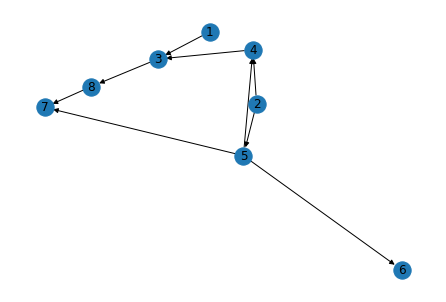

In [276]:
DG = init_graph()
nx.draw(DG, with_labels=True)

In [275]:
do_random_walk(1000)
print_walks()

(1, 3) 126
(3, 8) 502
(2, 4) 58
(2, 5) 56
(4, 3) 246
(5, 4) 64
(5, 6) 61
(5, 7) 58
(8, 7) 636


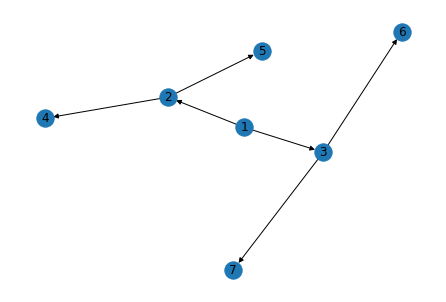

In [278]:
DG = init_tree()
nx.draw(DG, with_labels=True)

In [273]:

do_random_walk(1000)
print_walks()

(1, 2) 81
(1, 3) 78
(2, 4) 100
(2, 5) 109
(3, 6) 118
(3, 7) 115


In [236]:
do_random_walk(1000)
print_walks()

## Limited Start

In [280]:
DG = init_graph()
do_random_walk(1000, limited=True)
print_walks()

(1, 3) 498
(3, 8) 836
(2, 4) 260
(2, 5) 242
(4, 3) 338
(5, 4) 78
(5, 6) 70
(5, 7) 94
(8, 7) 836


## Loop Detection

In [290]:
DG = init_tree()
DG.add_edges_from([(6, 1, {'walks':0})])

In [291]:
do_random_walk(1000)
print_walks()

(1, 2) 256
(1, 3) 243
(2, 4) 214
(2, 5) 181
(3, 6) 195
(3, 7) 180
(6, 1) 343


In [325]:
DG = nx.DiGraph()
DG.add_edges_from([(1,2),(2,3),(3,4),(2,4),(4,2),(4,1),(5,2),(1,6),(6,4)])
add_walks_property(DG)

In [326]:
do_random_walk(10000,limited=True, endless=True)
print_walks()

(1, 2) 5521
(1, 6) 5589
(2, 3) 13066
(2, 4) 12891
(3, 4) 11898
(4, 2) 13080
(4, 1) 12989
(5, 2) 10000
(6, 4) 4966


In [304]:
get_starting_node()

1